<a href="https://colab.research.google.com/github/pkboom/metacode-machine-learning/blob/master/%5Bassignment%5D_Polynomial_Regression_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic setting
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/curinc/regression

/content/drive/MyDrive/curinc/regression


# [과제] 주어진 데이터에 대해서 다항 회귀 모델 학습하기

---

## 본 과제의 목표는 다음과 같음

1. 데이터를 불러오고, 학습과 평가 데이터로 나눌 수 있음
2. `numpy`를 이용해, 간단한 다항 회귀 모델을 구현하고 경사 하강법을 통해 학습할 수 있음
3. `sklearn` 라이브러리의 클래스를 활용해 다항 회귀 모델을 정의하고 학습할 수 있음

In [ ]:
# Making polynomial data
n = 3 # degree of the polynomial

roots = np.random.uniform(-1, 1, n)   # Generates random roots for a 5th degree polynomial
polyCoefficients = np.poly(roots)   # Find coefficients of polynomial that has said roots

X = np.arange(-100, 100)   # Randomly generated X values
y = np.polyval(polyCoefficients, X)   # Corresponding Y values passed through polynomial

delta = np.random.uniform(-300000, 300000, size=(200,))
y += delta


def normalize(X):
    return (X - X.mean()) / X.std()

X = normalize(X)
y = normalize(y)

with open('./data/polynomial_regression.pickle', 'wb') as f:
    pickle.dump([X, y], f)

In [ ]:
# Load the dataset
with open('./data/polynomial_regression.pickle', 'rb') as f:
    X, y = pickle.load(f)

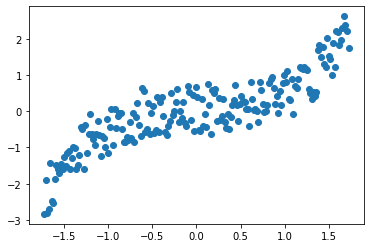

In [ ]:
# Check the dataset distribution    
plt.scatter(X, y)
plt.show()

## [P.1] 학습 데이터와 평가 데이터로 나누기
---

- 이 때, 평가 데이터는 전체의 20%로 설정
- 학습과 평가 데이터셋을 각각 시각화하여 보여주기

In [ ]:
# Use sklearn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

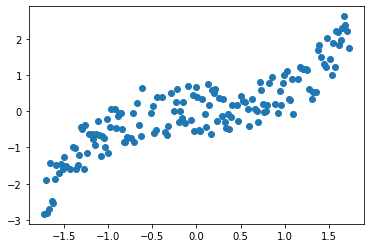

In [ ]:
# Visualize train dataset  
plt.scatter(X_train, y_train)
plt.show()

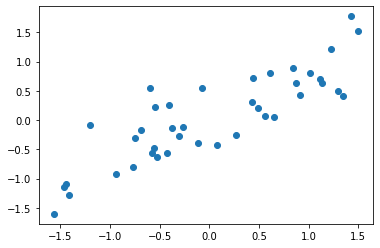

In [ ]:
# Visualize train dataset  
plt.scatter(X_test, y_test)
plt.show()

## [P.2] `numpy` 라이브러리를 통해, 최적의 다항 회귀 모델 학습

---

- 데이터의 분포를 살펴보고, 가장 적합해 보이는 차수의 다항 회귀 모델을 정의
- 각 파라미터의 최적값을 경사 하강법을 통해 찾기
- 이 때의 학습 손실값과 평가 데이터에 대한 손실값을 계산

### 위 데이터에 가장 적합한 회귀 모델은 3차 함수 형태의 모델임
\begin{equation*}
f(x) = w_1X^3 + w_2X^2 + w_3X + b
\end{equation*}

- 파라미터는 총 4개 존재함

In [ ]:
def gd_numpy(X, y, epochs, lr):
    # Model weights and bias parameters
    w1 = 1.0
    w2 = 1.0
    w3 = 1.0
    b = 1.0

    # Perform Gradient Descent
    for i in range(epochs):

    #################################################
    ######## Hint: use +, -, *, /, **, np.mean() ########
        loss = np.mean((y - (w1*X**3 + w2*X**2 + w3*X + b))**2)   # MSE loss

        dw1 = -2 * np.mean((y - (w1*X**3 + w2*X**2 + w3*X + b)) * X**3)   # derivative w.r.t to w
        dw2 = -2 * np.mean((y - (w1*X**3 + w2*X**2 + w3*X + b)) * X**2)   # derivative w.r.t to w
        dw3 = -2 * np.mean((y - (w1*X**3 + w2*X**2 + w3*X + b)) * X)   # derivative w.r.t to w
        db = -2 * np.mean(y - (w1*X**3 + w2*X**2 + w3*X + b))   # derivative w.r.t to b
    #################################################

        w1 = w1 - lr * dw1   # update w
        w2 = w2 - lr * dw2   # update w
        w3 = w3 - lr * dw3   # update w
        b = b - lr * db   # update b

    print('Trained model weights : %.4f, %.4f, %.4f' % (w1, w2, w3))
    print('Trained model bias : %.4f' % b)
    
    return w1, w2, w3, b

In [ ]:
# Training setting
epochs = 1000
learning_rate = 1e-6

w1, w2, w3, b = gd_numpy(X_train, y_train, epochs, learning_rate)

Trained model weights : 0.9916, 0.9940, 0.9959
Trained model bias : 0.9959


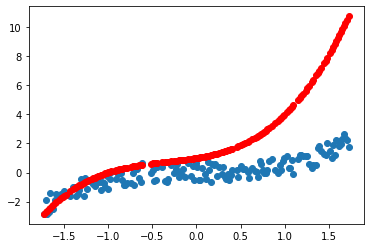

In [ ]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_train, y_train)   

# plot prediction results
y_pred = w1*X_train**3 + w2*X_train**2 + w3*X_train + b

plt.scatter(X_train, y_pred, color='red')
plt.show()

In [ ]:
# get train loss
y_pred = w1*X_train**3 + w2*X_train**2 + w3*X_train + b

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 9.3868


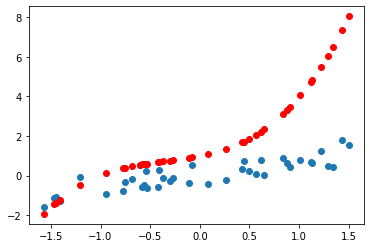

In [ ]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)   

# plot prediction results
y_pred = w1*X_test**3 + w2*X_test**2 + w3*X_test + b

plt.scatter(X_test, y_pred, color='red')
plt.show()

In [ ]:
y_pred = w1*X_test**3 + w2*X_test**2 + w3*X_test + b
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 6.8398


## [P.3] `sklearn` 라이브러리를 통해, 최적의 다항 회귀 모델 학습

---

- 다항 회귀 모델 학습에 필요한 `sklearn`의 클래스를 사용 (Hint: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), [pseudo_code](https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn))
- 주어진 데이터에 대해 학습 및 평가 진행
- P.2와 마찬가지로 학습 손실값과 평가 데이터에 대한 손실값을 계산

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
X_train.reshape(-1, 1)

In [ ]:
def gd_sklearn(X, y, degree):
    # preprocessing
    X_2d = X.reshape(-1, 1)
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_2d)
    
    reg = LinearRegression()
    reg.fit(X_poly, y)

#     print('Trained model weights : %s' % w)
    
    return poly, reg

In [ ]:
degree = 3

poly, reg = gd_sklearn(X_train, y_train, degree)

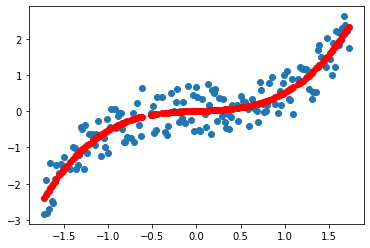

In [ ]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_train, y_train)   

# plot prediction results
y_pred = reg.predict(poly.fit_transform(X_train.reshape(-1, 1)))

plt.scatter(X_train, y_pred, color='red')
plt.show()

In [ ]:
# get train loss
train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 0.1601


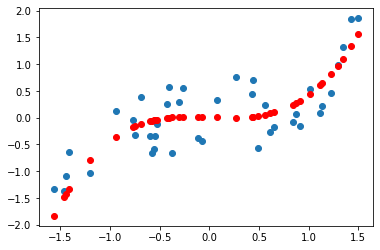

In [ ]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)   

# plot prediction results
y_pred = reg.predict(poly.fit_transform(X_test.reshape(-1, 1)))

plt.scatter(X_test, y_pred, color='red')
plt.show()

In [ ]:
# get test loss
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

ValueError: ignored